## Group members

1.   Myra Lugwiri
2.   Topister Onyango



#### Data Source
> Data made available for the financial inclusion in Africa competition on the platform Zindi https://zindi.africa/competitions/financial-inclusion-in-africa/data



In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [2]:
#Loading the data
train_data = pd.read_csv('./Train.csv')
test_data  = pd.read_csv('./Test.csv')

In [3]:
#looking into the data
train_data.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
#assessing the data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [7]:
# looking into the statistical summary
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
#checking for missing values
train_data.isnull().sum()


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
#checking for missing values in the training data
test_data.isnull().sum()


country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
# Drop the 'uniqueid' column as it is not relevant for modeling
train_data.drop(columns=["uniqueid"], inplace=True)  # Drop 'uniqueid' column


In [11]:
print(train_data.columns)


Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')


### Feature Engineering
> Before proceeding to train the model we will perform feature engineering on the dataset.
1. We will create new columns from existing one e.g we willl create the column 'age_group' through the process of binning 'age_of_respondent'
2. We will encode categorical columns
3. we will standardise the data

In [12]:

# Encode categorical variables
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(train_data[['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']])
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']))
train_data.drop(['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'], axis=1, inplace=True)
train_data = pd.concat([train_data.reset_index(drop=True), encoded_df], axis=1)

In [13]:

# Split features and target variable
X = train_data.drop("bank_account", axis=1)
y = train_data["bank_account"]

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:

# Model Training
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [18]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [20]:
#combining predictions using a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('Random Forest', random_forest_model),
        ('Gradient Boosting', gradient_boosting_model),
        
    ],
    voting='hard'
)

In [21]:

#training the ensemble model
ensemble_model.fit(X_train, y_train)

#evaluating the validation set
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Accuracy on the validation set with Ensemble Model:", ensemble_accuracy)


Accuracy on the validation set with Ensemble Model: 0.8869368092944176


#### Model Training

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# each models' performance
models = {
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model
}


Accuracy for Random Forest: 0.8636
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.94      0.92      6073
         Yes       0.51      0.39      0.45       985

    accuracy                           0.86      7058
   macro avg       0.71      0.67      0.68      7058
weighted avg       0.85      0.86      0.86      7058



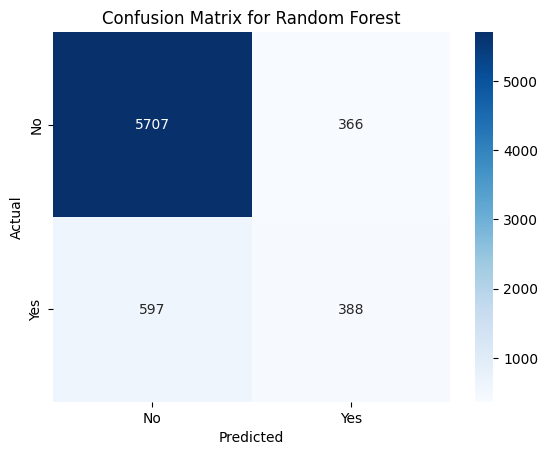


Accuracy for Gradient Boosting: 0.8898
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.98      0.94      6073
         Yes       0.72      0.34      0.46       985

    accuracy                           0.89      7058
   macro avg       0.81      0.66      0.70      7058
weighted avg       0.88      0.89      0.87      7058



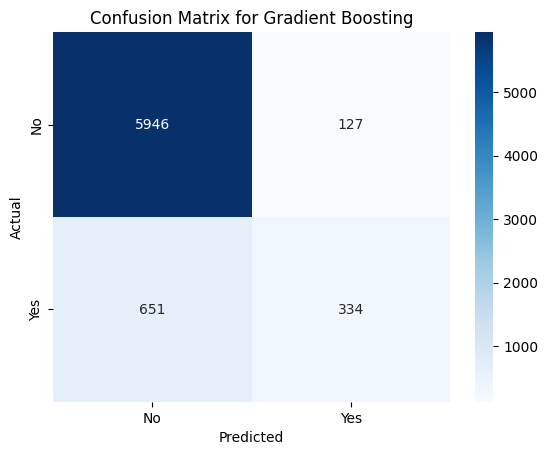

In [24]:

for model_name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print(f"\nAccuracy for {model_name}: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, predictions))

    #confusion Matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [25]:
#evaluating the ensemble model on the validation set
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print("Accuracy on the validation set with Ensemble Model:", ensemble_accuracy)


Accuracy on the validation set with Ensemble Model: 0.8869368092944176


In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)

# Evaluate on the validation set
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Accuracy on the validation set with the best Random Forest model:", best_rf_accuracy)


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on the validation set with the best Random Forest model: 0.8890620572400113


In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [28]:
#Training a  GradientBoostingClassifier model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=200, min_samples_split=10, random_state=42)
gradient_boosting_model.fit(X_train, y_train)
predictions = gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"\nAccuracy for {model_name}: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, predictions))



Accuracy for Gradient Boosting: 0.8886
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.98      0.94      6073
         Yes       0.70      0.35      0.47       985

    accuracy                           0.89      7058
   macro avg       0.80      0.66      0.70      7058
weighted avg       0.87      0.89      0.87      7058



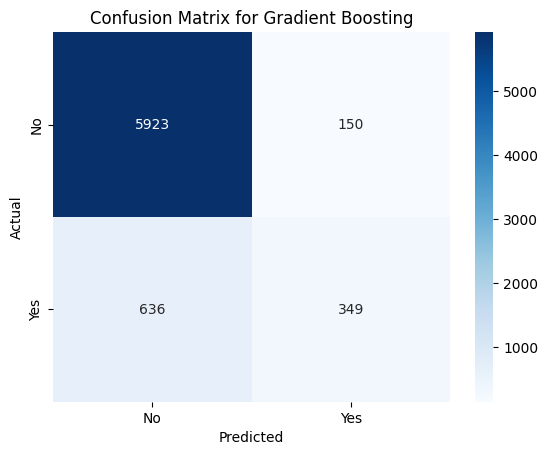

In [29]:

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

In [30]:
print(conf_matrix)

[[5923  150]
 [ 636  349]]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#The parameter grid to search
param_grid = {
    'n_estimators': [10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Initializing the GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

#Initializing GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=2)

#Performing GridSearchCV
grid_search.fit(X_train, y_train)

#getting the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

#Using the best estimator to make predictions
predictions = best_estimator.predict(X_test)

#evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Best parameters: {best_params}")
print(f"Validation accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, predictions))




Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 20}
Validation accuracy: 0.8896
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.98      0.94      6073
         Yes       0.72      0.34      0.46       985

    accuracy                           0.89      7058
   macro avg       0.81      0.66      0.70      7058
weighted avg       0.88      0.89      0.87      7058



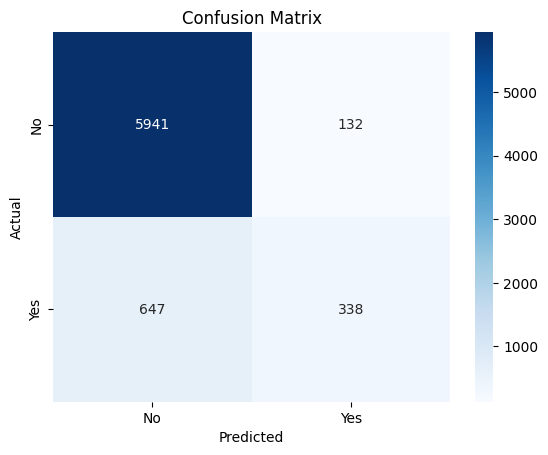

In [32]:
#confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(conf_matrix)

[[5941  132]
 [ 647  338]]


In [34]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

#### Conclusion
> The model we are working with is gradient_boosting_model because it has the highest accuracy of 89% compared to the other models. Hence, it signifies its effectiveness in capturing the complexities of the underlying data and making accurate predictions.

Model deployment

In [35]:
import joblib

# Assuming your trained model is stored in 'gradient_boosting_model.pkl'
joblib.dump(gradient_boosting_model, 'GBM_model.pkl')


['GBM_model.pkl']

In [36]:
import joblib

# Assuming your model is stored in a variable named gradient_boosting_model
joblib.dump(gradient_boosting_model, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

In [37]:
# Save the model and encoder
joblib.dump(encoder, "encoderGBC.pkl")

['encoderGBC.pkl']

In [38]:
import pandas as pd
import joblib


# Load the model
# model = joblib.load("bank_account_prediction_model.pkl")
model = joblib.load("gradient_boosting_model.pkl")


# Load the encoder (if needed)
# encoder = joblib.load("encoder.pkl")
encoder = joblib.load("encoder.pkl")
# Load the test data
test_data = pd.read_csv("Test.csv")

# Data Preprocessing for test data (similar to what we did for training data)
test_data.dropna(inplace=True)  # Drop rows with missing values for simplicity
test_data.drop(columns=["uniqueid"], inplace=True)  # Drop 'uniqueid' column

# If using encoder for categorical encoding
encoded_cols_test = encoder.transform(test_data[['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']])
encoded_df_test = pd.DataFrame(encoded_cols_test.toarray(), columns=encoder.get_feature_names_out(['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']))
test_data.drop(['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'], axis=1, inplace=True)
test_data = pd.concat([test_data.reset_index(drop=True), encoded_df_test], axis=1)

# Make predictions on test data
predictions = model.predict(test_data)

# Show predictions
print(predictions)




['Yes' 'Yes' 'No' ... 'No' 'No' 'No']
